In [1]:
# For the SSL error I was getting
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and prepare the CIFAR-10 dataset
(cifar_images, cifar_labels), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
# Normalize the input images
cifar_images = cifar_images / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
cifar_labels = tf.keras.utils.to_categorical(cifar_labels, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [10]:
# Design four CNN models to classify CIFAR-10 images with the following features
'''
\begin{itemize}
    --- First structure includes two convolutional layers with ReLU activation. The first layer with 16 filters and the second filter 32 filters. Use the filter size (5,5)
    --- Second structure includes two convolutional layers with ReLU activation. The first layer with 32 filters and the second filter 64 filters. Use the filter size (3,3)
    --- Third structure includes three convolutional layers with ReLU activation. The first layer with 16 filters, the second layer 32 filters, and the third filter 64 filters. Use the filter size (3,3)
    --- Forth structure includes three convolutional layers with ReLU activation. The first layer with 32 filters, the second layer 64 filters, and the third filter 64 filters. Use the filter size (3,3)
    \item Pooling layers following each convolutional layer to reduce the spatial dimensions of the feature maps.
    \item A flattening layer to convert the 2D feature maps into a 1D vector.
    \item Dense layers with 64 nodes and a relu activation function.
    \item Dense layers that lead to the final classification output. The last layer should have 10 units with a softmax activation function, corresponding to the CIFAR-10 classes.
\end{itemize}
'''

model_1 = models.Sequential([
    layers.Conv2D(16, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_3 = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
'''
Use an optimizer and loss function suitable for a classification problem
(categorical cross-entropy is recommended), and include accuracy as a metric.
'''
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


# Train the model for at least 10 epochs.
def train_model(model):
    history = model.fit(cifar_images, cifar_labels, epochs=10,
                        validation_data=(x_test, y_test), batch_size=64)
    return history

# Evaluate the model
def evaluate_model(model):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Test')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Test')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3289 - loss: 1.8165 - val_accuracy: 0.5007 - val_loss: 1.3828
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5324 - loss: 1.3158 - val_accuracy: 0.5693 - val_loss: 1.2036
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5843 - loss: 1.1670 - val_accuracy: 0.6058 - val_loss: 1.1148
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6214 - loss: 1.0835 - val_accuracy: 0.6039 - val_loss: 1.1291
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6444 - loss: 1.0071 - val_accuracy: 0.6388 - val_loss: 1.0386
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6724 - loss: 0.9380 - val_accuracy: 0.6465 - val_loss: 1.0020
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6816 - loss: 0.9054 - val_accuracy: 0.6515 - val_loss: 0.9960
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6956 - loss: 0.8639 - val_accuracy: 0.

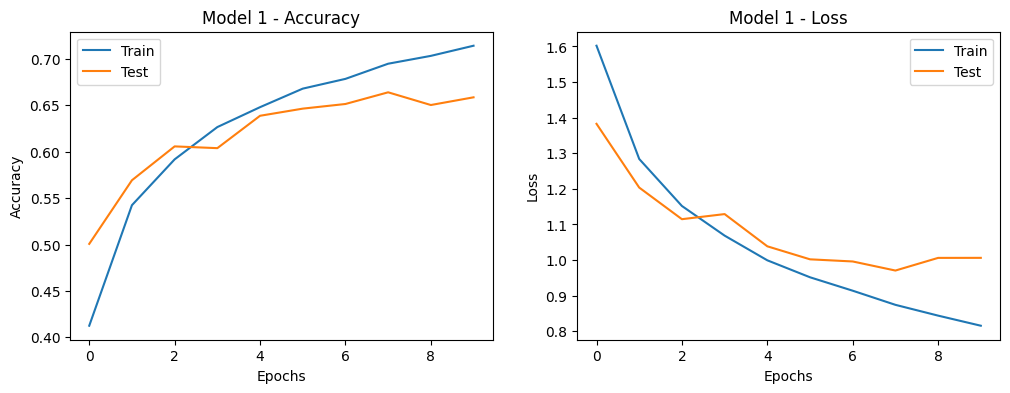

In [11]:
compile_model(model_1)
history_1 = train_model(model_1)
evaluate_model(model_1)
plot_history(history_1, "Model 1")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3512 - loss: 1.7857 - val_accuracy: 0.5390 - val_loss: 1.2882
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5583 - loss: 1.2512 - val_accuracy: 0.5950 - val_loss: 1.1547
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6227 - loss: 1.0751 - val_accuracy: 0.6425 - val_loss: 1.0377
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6589 - loss: 0.9739 - val_accuracy: 0.6514 - val_loss: 0.9970
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6852 - loss: 0.9065 - val_accuracy: 0.6541 - val_loss: 1.0010
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7044 - loss: 0.8523 - val_accuracy: 0.6739 - val_loss: 0.9498
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7232 - loss: 0.7958 - val_accuracy: 0.6863 - val_loss: 0.9284
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7357 - loss: 0.7582 - v

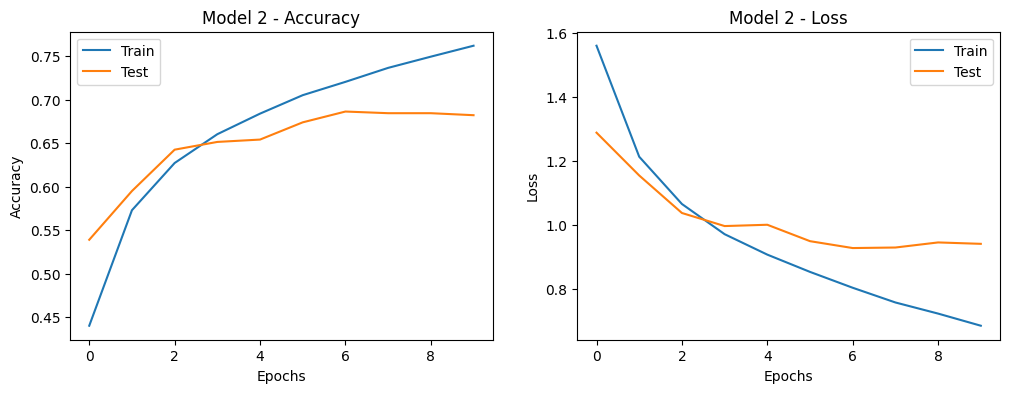

In [12]:
compile_model(model_2)
history_2 = train_model(model_2)
evaluate_model(model_2)
plot_history(history_2, "Model 2")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2843 - loss: 1.9210 - val_accuracy: 0.4677 - val_loss: 1.4725
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4966 - loss: 1.3902 - val_accuracy: 0.5240 - val_loss: 1.3241
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5640 - loss: 1.2267 - val_accuracy: 0.5764 - val_loss: 1.1981
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5891 - loss: 1.1459 - val_accuracy: 0.5978 - val_loss: 1.1376
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6216 - loss: 1.0736 - val_accuracy: 0.6170 - val_loss: 1.0967
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6407 - loss: 1.0190 - val_accuracy: 0.6206 - val_loss: 1.0966
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6639 - loss: 0.9662 - val_accuracy: 0.6404 - val_loss: 1.0331
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6660 - loss: 0.9485 - val_accura

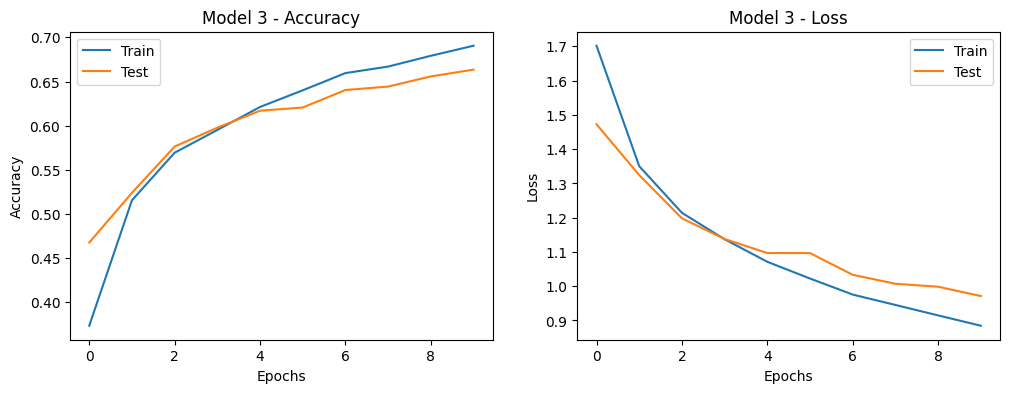

In [13]:
compile_model(model_3)
history_3 = train_model(model_3)
evaluate_model(model_3)
plot_history(history_3, "Model 3")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.3200 - loss: 1.8385 - val_accuracy: 0.5157 - val_loss: 1.3768
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.5451 - loss: 1.2711 - val_accuracy: 0.6010 - val_loss: 1.1456
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6145 - loss: 1.0935 - val_accuracy: 0.6134 - val_loss: 1.1221
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6535 - loss: 0.9903 - val_accuracy: 0.6436 - val_loss: 1.0066
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6797 - loss: 0.9206 - val_accuracy: 0.6446 - val_loss: 1.0250
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7026 - loss: 0.8532 - val_accuracy: 0.6751 - val_loss: 0.9268
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7180 - loss: 0.8067 - val_accuracy: 0.6661 - val_loss: 0.9925
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7360 - loss: 0.7654 - 

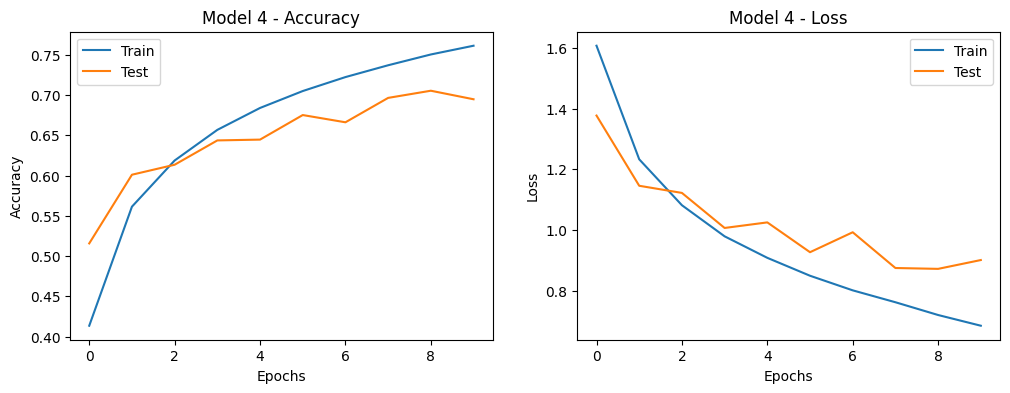

In [14]:
compile_model(model_4)
history_4 = train_model(model_4)
evaluate_model(model_4)
plot_history(history_4, "Model 4")